In [ ]:
import pandas as pd
import time
import math
from keras.models import Sequential
from tensorflow.keras import utils, models
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
from keras import layers
import numpy as np
import sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('AMZN.csv')

In [ ]:
df['Volume'] = df['Volume'] / 1000000
col_list = ["Open", "High", "Low", "Close", "Volume"]
df = df[col_list]
df.head()

,Open,High,Low,Close,Volume
0,82.878502,82.904503,79.818001,81.389999,1.124940e-22
1,80.917503,83.250000,80.727501,82.140503,8.514800e-23
2,83.650002,87.961502,83.204002,87.774498,1.638440e-22
3,87.750000,89.199997,86.255501,87.745499,1.306980e-22
4,86.625000,87.195999,85.093498,85.621498,1.180440e-22


In [ ]:
X = df.drop(['Close'],axis = 1)
X = X.iloc[1:]

y = df['Close'].iloc[:-1]
#y = y.reset_index()
#print(y)
y = np.asarray(y).astype('float32')

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=False)

X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.to_numpy().reshape(X_val.shape[0], X_val.shape[1], 1)


In [ ]:
model1 = tf.keras.models.Sequential([
  layers.LSTM(2, activation = 'relu', input_shape=(4, 1)),
  layers.Dense(1)
])

In [ ]:
model1.compile(optimizer = "adam",
              loss = "mean_squared_error")

history = model1.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 10, batch_size = 2,
                    shuffle = False, verbose=1)

Epoch 1/10
471/471 [==============================] - 4s 6ms/step - loss: 4.3821 - val_loss: 4.7662
Epoch 2/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1674 - val_loss: 4.5638
Epoch 3/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1406 - val_loss: 4.5335
Epoch 4/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1335 - val_loss: 4.5194
Epoch 5/10
471/471 [==============================] - 3s 6ms/step - loss: 4.1299 - val_loss: 4.5113
Epoch 6/10
471/471 [==============================] - 3s 6ms/step - loss: 4.1277 - val_loss: 4.5061
Epoch 7/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1261 - val_loss: 4.5024
Epoch 8/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1250 - val_loss: 4.4996
Epoch 9/10
471/471 [==============================] - 2s 5ms/step - loss: 4.1240 - val_loss: 4.4973
Epoch 10/10
471/471 [==============================] - 3s 6ms/step - loss: 4.1232 - val_loss: 4.4954

In [ ]:
predict_test = model1.predict(X_test)
amz = pd.DataFrame({
    "Predicted": predict_test[:100].ravel(),
    "real": y_test[:100].ravel()
})
amz.head()

3/3 [==============================] - 0s 8ms/step


,Predicted,real
0,133.308334,134.679993
1,131.504135,133.559998
2,132.820831,132.830002
3,131.588684,135.360001
4,129.262482,129.960007


<Axes: title={'center': 'outcome'}>

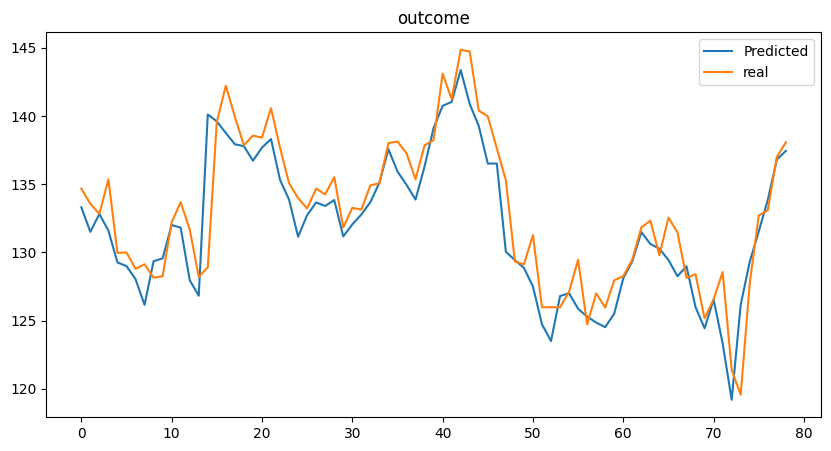

In [ ]:
amz.plot(title="outcome", figsize=(10,5))

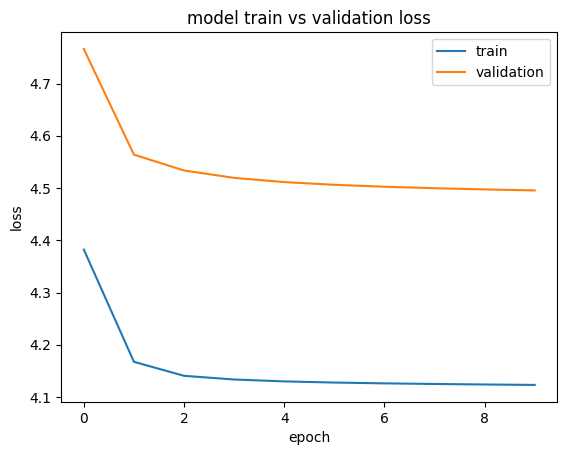

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
model2 = tf.keras.models.Sequential([
  layers.LSTM(2, activation = 'relu', input_shape=(4, 1)),
  layers.Dropout(0.2),
  layers.Dense(1)
])

In [ ]:
model2.compile(optimizer = "adam",
              loss = "mean_squared_error")

history = model2.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 30, batch_size = 2,
                    shuffle = False, verbose=1)

Epoch 1/30
471/471 [==============================] - 5s 6ms/step - loss: 4101.4707 - val_loss: 477.0078
Epoch 2/30
471/471 [==============================] - 3s 6ms/step - loss: 3168.1355 - val_loss: 497.9951
Epoch 3/30
471/471 [==============================] - 3s 7ms/step - loss: 3668.5205 - val_loss: 509.6703
Epoch 4/30
471/471 [==============================] - 2s 5ms/step - loss: 3712.0645 - val_loss: 515.0701
Epoch 5/30
471/471 [==============================] - 2s 5ms/step - loss: 3646.5508 - val_loss: 511.5907
Epoch 6/30
471/471 [==============================] - 2s 5ms/step - loss: 3333.0728 - val_loss: 522.9183
Epoch 7/30
471/471 [==============================] - 2s 5ms/step - loss: 3502.0444 - val_loss: 492.0722
Epoch 8/30
471/471 [==============================] - 3s 7ms/step - loss: 3485.9187 - val_loss: 505.6651
Epoch 9/30
471/471 [==============================] - 3s 6ms/step - loss: 3393.0386 - val_loss: 504.2803
Epoch 10/30
471/471 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
predict_test = model2.predict(X_test)
amz = pd.DataFrame({
    "Predicted": predict_test[:100].ravel(),
    "real": y_test[:100].ravel()
})
amz.head()

3/3 [==============================] - 0s 5ms/step


,Predicted,real
0,132.847427,134.679993
1,130.555313,133.559998
2,131.795761,132.830002
3,131.093369,135.360001
4,129.596542,129.960007


<Axes: title={'center': 'outcome'}>

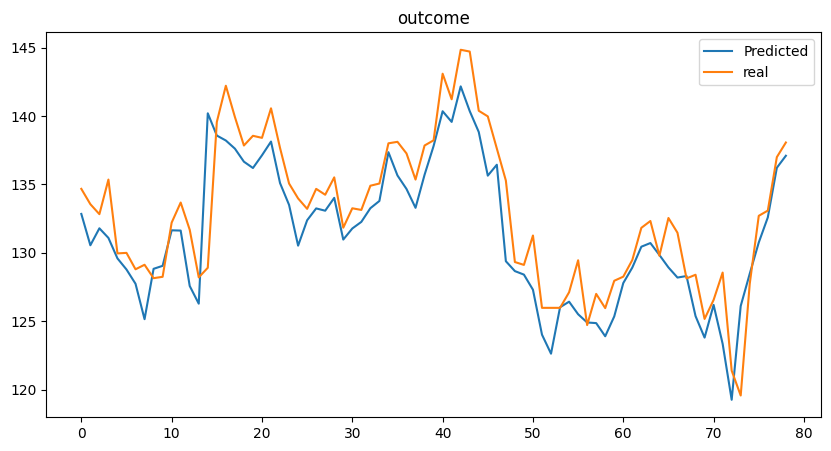

In [ ]:
amz.plot(title="outcome", figsize=(10,5))

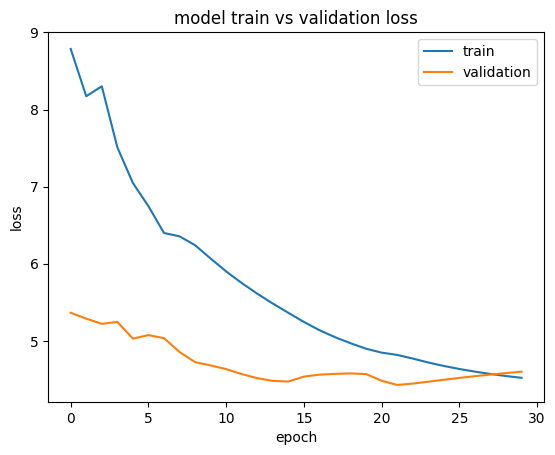